# Model Building

better to plot with scatter plot, but many features so plot several scatter of one variable feature with all others kept constant

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import poisson
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
xgb.set_config(verbosity=0)
from sklearn.feature_selection import RFECV
import random
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Drop first column of dataframe
def drop_first_col(df):
    return df.iloc[: , 1:]

X_train_20 = pd.read_csv("dataset\X_train_str_20.csv")
X_test_20 = pd.read_csv("dataset\X_test_str_20.csv")
y_train_20 = pd.read_csv("dataset\y_train_str_20.csv")
y_test_20 = pd.read_csv("dataset\y_test_str_20.csv")

X_train_40 = pd.read_csv("dataset\X_train_str_40.csv")
X_test_40 = pd.read_csv("dataset\X_test_str_40.csv")
y_train_40 = pd.read_csv("dataset\y_train_str_40.csv")
y_test_40 = pd.read_csv("dataset\y_test_str_40.csv")

X_train_20 = drop_first_col(X_train_20)
X_test_20 = drop_first_col(X_test_20)
y_train_20 = drop_first_col(y_train_20)
y_test_20 = drop_first_col(y_test_20)

X_train_40 = drop_first_col(X_train_40)
X_test_40 = drop_first_col(X_test_40)
y_train_40 = drop_first_col(y_train_40)
y_test_40 = drop_first_col(y_test_40)

## Test on single simple models

### Create average slope model to check if a tested model performs well

In [ ]:
def avg_slope(X_train,y_train,X_test,y_test,model_predicts):
    y_train_mean = np.full(shape=len(y_train),fill_value=mean(y_train),dtype=np.float)
    
    model = LinearRegression()
    model.fit(X_train,y_train_mean)
    y_predicted = model.predict(X_test)
    
    print("FOR AVG SLOPE MODEL:")
    print("RMSE =", math.sqrt(mean_squared_error(y_test, y_predicted)))
    print("MAE =", mean_absolute_error(y_test, y_predicted))
    
    plt.scatter(range(len(y_test)),model_predicts)
    plt.plot(y_predicted)
    plt.plot(y_test)
    plt.ylabel('Slope pred')
    plt.xlabel('Patients')
    plt.legend(['tested model prediction','average slope prediction','true values'])
    plt.show()

### Single XGB Regressor (with no hyperparameters selection)

In [14]:
def check_acc(X_train,y_train,X_test,y_test,model):
    model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)

    print("RMSE =", math.sqrt(mean_squared_error(y_test, y_predicted)))
    print("MAE =", mean_absolute_error(y_test, y_predicted), 2)
    
    plt.plot(y_test, label="original")
    plt.plot(y_predicted, label="predicted")
    plt.ylabel('Decline slope')
    plt.xlabel('Patients')
    plt.legend()
    plt.show()

    return y_predicted

In [15]:
def XGB_class(X_train, X_test, y_train, y_test):
    clf = xgb.XGBRegressor()
    return check_acc(X_train, y_train, X_test, y_test,clf)

Using 20% as test subset:
RMSE = 0.3009929021770659
MAE = 0.2539320291287223 2


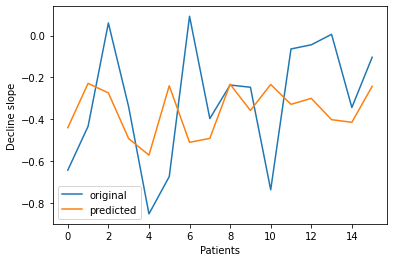

Using 40% as test subset:
RMSE = 0.3047640709792044
MAE = 0.26807980804501663 2


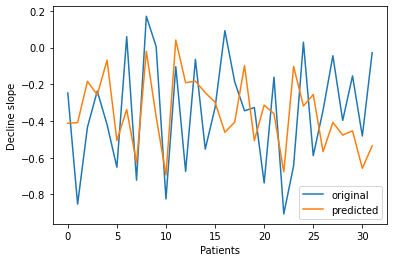

In [16]:
print('Using 20% as test subset:')
y_preds_20_XGB = XGB_class(X_train_20,X_test_20,y_train_20,y_test_20)
print('Using 40% as test subset:')
y_preds_40_XGB = XGB_class(X_train_40,X_test_40,y_train_40,y_test_40)

FOR AVG SLOPE MODEL:
RMSE = 0.2884246830744676
MAE = 0.24371930810028042


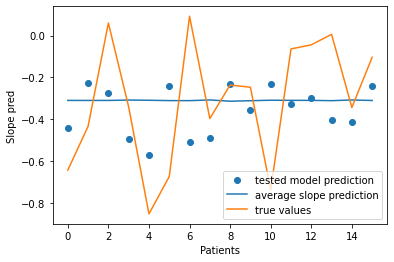

FOR AVG SLOPE MODEL:
RMSE = 0.30547703499175943
MAE = 0.2568851079753572


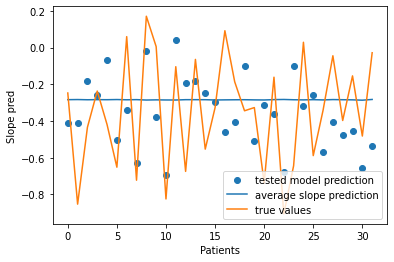

In [17]:
avg_slope(X_train_20,y_train_20,X_test_20,y_test_20,y_preds_20_XGB)
avg_slope(X_train_40,y_train_40,X_test_40,y_test_40,y_preds_40_XGB)

### Simple Linear Regression

Using 20% as test subset:
RMSE = 0.3308101942181599
MAE = 0.26085820265049714 2


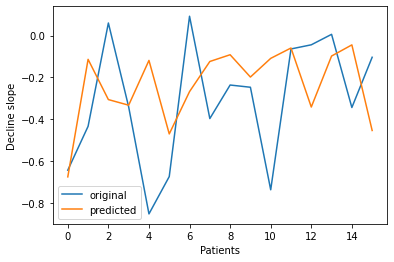

Using 40% as test subset:
RMSE = 0.34261742918625226
MAE = 0.2895144711419033 2


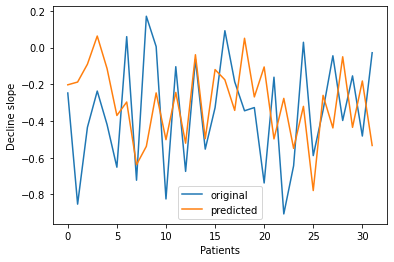

array([[-0.2023897 ],
       [-0.18736651],
       [-0.09009881],
       [ 0.06334265],
       [-0.11416441],
       [-0.36949575],
       [-0.29623492],
       [-0.63760348],
       [-0.53771698],
       [-0.2465387 ],
       [-0.50117443],
       [-0.24391094],
       [-0.52048326],
       [-0.03855375],
       [-0.49589728],
       [-0.11953754],
       [-0.17510998],
       [-0.34176322],
       [ 0.05114769],
       [-0.26835712],
       [-0.10514232],
       [-0.49710017],
       [-0.27634504],
       [-0.54855661],
       [-0.3198975 ],
       [-0.77850084],
       [-0.25989579],
       [-0.43734216],
       [-0.04966281],
       [-0.43416896],
       [-0.18155292],
       [-0.53297188]])

In [18]:
print('Using 20% as test subset:')
check_acc(X_train_20,y_train_20,X_test_20,y_test_20,LinearRegression())
print('Using 40% as test subset:')
check_acc(X_train_40,y_train_40,X_test_40,y_test_40,LinearRegression())

### RFE with XGBRegressor

In [19]:
def rfe_xgb(X_train, y_train,X_test):
    min_features_to_select = 1
    
    clf = xgb.XGBRegressor()
    rfecv = RFECV(estimator=clf,step=3,n_jobs=-1,scoring="r2",cv=5)
    rfecv.fit(X_train, y_train)
    
    #keep selected features + check RFE accuracy scores during running
    newX_train = X_train[X_train.columns[rfecv.support_]]
    newX_test = X_test[X_test.columns[rfecv.support_]]
    print('We kept',newX_train.shape[1],'features out of the',X_train.shape[1])
    
    return newX_train,newX_test

Using 20% as test subset:
We kept 86 features out of the 320
RMSE = 0.30097927210284775
MAE = 0.25377840188210404 2


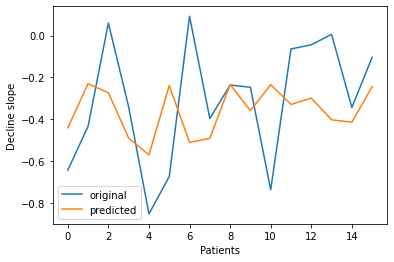

Using 40% as test subset:
We kept 20 features out of the 320
RMSE = 0.32231216835376936
MAE = 0.28205944836868535 2


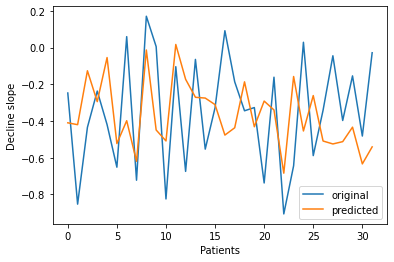

array([-0.40945482, -0.4195891 , -0.1259033 , -0.29416323, -0.0539722 ,
       -0.52253306, -0.3980182 , -0.61921215, -0.01276108, -0.44857532,
       -0.508202  ,  0.01735733, -0.17235963, -0.27040273, -0.27466533,
       -0.3104269 , -0.4762839 , -0.43647724, -0.18626285, -0.43097726,
       -0.29102746, -0.33937192, -0.6838031 , -0.1572566 , -0.45391366,
       -0.26106992, -0.5086284 , -0.5246295 , -0.51202375, -0.43316907,
       -0.6333445 , -0.5405618 ], dtype=float32)

In [20]:
#test rfe then simple XGB classifier
print('Using 20% as test subset:')
newX_train_20,newX_test_20 = rfe_xgb(X_train_20, y_train_20,X_test_20)
XGB_class(newX_train_20,newX_test_20,y_train_20,y_test_20)
print('Using 40% as test subset:')
newX_train_40,newX_test_40 = rfe_xgb(X_train_40, y_train_40,X_test_40)
XGB_class(newX_train_40,newX_test_40,y_train_40,y_test_40)

## Elastic Net (with hyperparameters)

a penalized linear regression model that includes both the L1 and L2 penalties during training. Using the terminology from “The Elements of Statistical Learning,” a hyperparameter “alpha” is provided to assign how much weight is given to each of the L1 and L2 penalties

In [21]:
def Elastic_NetCV(X_train, y_train):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define model
    ratios = arange(0, 1, 0.1)
    alphas = arange(0, 5, 1)
    model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
    # fit model
    model.fit(X_train, y_train)

    alpha = model.alpha_
    l1_ratio=model.l1_ratio_
    
    return alpha, l1_ratio

In [22]:
def Elastic_Net(X_train,y_train,X_test,y_test,alpha,l1_ratio):
    #hyperparameters found above:
    print('alpha: %f' % alpha)
    print('l1_ratio: %f' % l1_ratio)

    #play around with parameters to check changes
    alpha-=0
    l1_ratio+=0

    # define model
    model = ElasticNet(alpha = alpha, l1_ratio=l1_ratio)
    check_acc(X_train,y_train,X_test,y_test,model)

Using 20% as test subset:
alpha: 4.000000
l1_ratio: 0.000000
RMSE = 0.26442061471698525
MAE = 0.22137557298104338 2


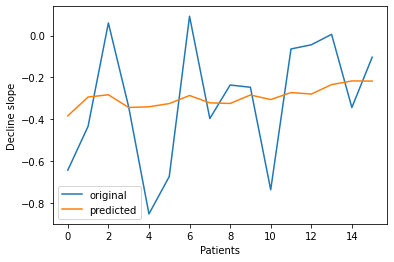

Using 40% as test subset:
alpha: 4.000000
l1_ratio: 0.000000
RMSE = 0.2810802121614911
MAE = 0.24208470344066566 2


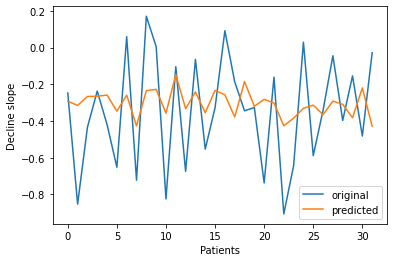

In [23]:
#test rfe then simple XGB classifier
print('Using 20% as test subset:')
alpha_20,l1_ratio_20 = Elastic_NetCV(X_train_20, y_train_20)
Elastic_Net(X_train_20,y_train_20,X_test_20,y_test_20,alpha_20,l1_ratio_20)
print('Using 40% as test subset:')
alpha_40,l1_ratio_40 = Elastic_NetCV(X_train_40, y_train_40)
Elastic_Net(X_train_40,y_train_40,X_test_40,y_test_40,alpha_40,l1_ratio_40)

## Sparse Partial Least Square

Partial least squares regression reduces the number of variables by projecting independent variables onto latent structures. Sparse PLS combines variable selection and modeling in a one-step procedure.

### First find best number of components

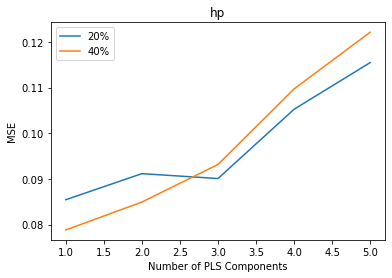

In [24]:
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection

def cross_val(X_train,y_train):
    #define cross-validation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    mse = []
    n = len(X_train)
    
    # Calculate MSE with only the intercept
    score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
               np.ones((n,1)), y_train, cv=cv, scoring='neg_mean_squared_error').mean()    
    mse.append(score)

    # Calculate MSE using cross-validation, adding one component at a time
    for i in np.arange(1, 6):
        pls = PLSRegression(n_components=i)
        score = -1*model_selection.cross_val_score(pls, X_train, y_train, cv=cv,
                   scoring='neg_mean_squared_error').mean()
        mse.append(score)

    #plot test MSE vs. number of components
    plt.plot(mse)
    plt.xlabel('Number of PLS Components')
    plt.ylabel('MSE')
    plt.title('hp')
    
cross_val(X_train_20,y_train_20)
cross_val(X_train_40,y_train_40)
plt.legend(['20%','40%'])

Here, best number of components is 3 in the two situations

Using 20% as test subset:
RMSE = 0.27060624505211234
MAE = 0.23381050798202163 2


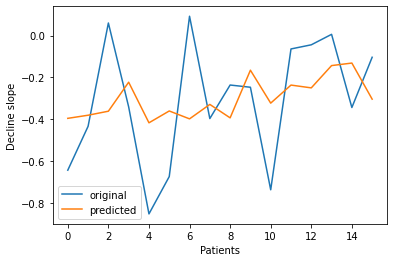

Using 40% as test subset:
RMSE = 0.27275342730115193
MAE = 0.22003549129887517 2


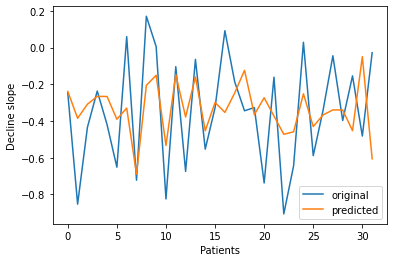

array([[-0.23842664],
       [-0.38462017],
       [-0.30807852],
       [-0.26547413],
       [-0.26604174],
       [-0.38993188],
       [-0.32942962],
       [-0.68948315],
       [-0.20533679],
       [-0.1504662 ],
       [-0.53270449],
       [-0.14687293],
       [-0.37756287],
       [-0.15947341],
       [-0.4528118 ],
       [-0.29872005],
       [-0.35271124],
       [-0.24678228],
       [-0.12341054],
       [-0.36515908],
       [-0.27287384],
       [-0.37253227],
       [-0.47207966],
       [-0.45847423],
       [-0.25151411],
       [-0.42983391],
       [-0.36645889],
       [-0.33920177],
       [-0.33944371],
       [-0.45226823],
       [-0.04904129],
       [-0.60561406]])

In [25]:
print('Using 20% as test subset:')
pls2_20 = PLSRegression(n_components=3)
check_acc(X_train_20,y_train_20,X_test_20,y_test_20,pls2_20)
print('Using 40% as test subset:')
pls2_40 = PLSRegression(n_components=3)
check_acc(X_train_40,y_train_40,X_test_40,y_test_40,pls2_40)